# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [9]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [10]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [15]:
net.loss(X)

array([[-0.81233741, -1.27654624, -0.70335995],
       [-0.17129677, -1.18803311, -0.47310444],
       [-0.51590475, -1.01354314, -0.8504215 ],
       [-0.15419291, -0.48629638, -0.52901952],
       [-0.00618733, -0.12435261, -0.15226949]])

In [16]:
scores = net.loss(X)
print 'Your scores:'
print scores
print
print 'correct scores:'
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print correct_scores
print

# The difference should be very small. We get < 1e-7
print 'Difference between your scores and correct scores:'
print np.sum(np.abs(scores - correct_scores))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027209255e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [18]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print 'Difference between your loss and correct loss:'
print np.sum(np.abs(loss - correct_loss))

Difference between your loss and correct loss:
1.79412040779e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [28]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
  print '%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

W1 max relative error: 9.457045e-10
W2 max relative error: 2.717897e-09
b2 max relative error: 1.050117e-10
b1 max relative error: 1.336361e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


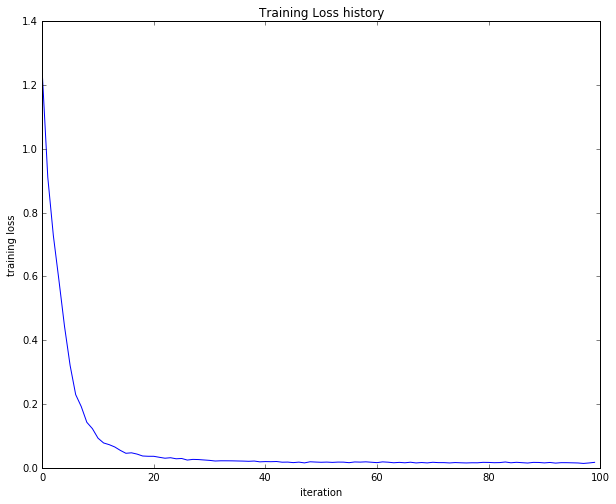

In [39]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print 'Final training loss: ', stats['loss_history'][-1]

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [40]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [50]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc



iteration 0 / 1000: loss 2.302981
iteration 100 / 1000: loss 2.302520
iteration 200 / 1000: loss 2.298896
iteration 300 / 1000: loss 2.262131
iteration 400 / 1000: loss 2.206285
iteration 500 / 1000: loss 2.118324
iteration 600 / 1000: loss 2.101989
iteration 700 / 1000: loss 2.109869
iteration 800 / 1000: loss 2.067583
iteration 900 / 1000: loss 1.892366
Validation accuracy:  0.296


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

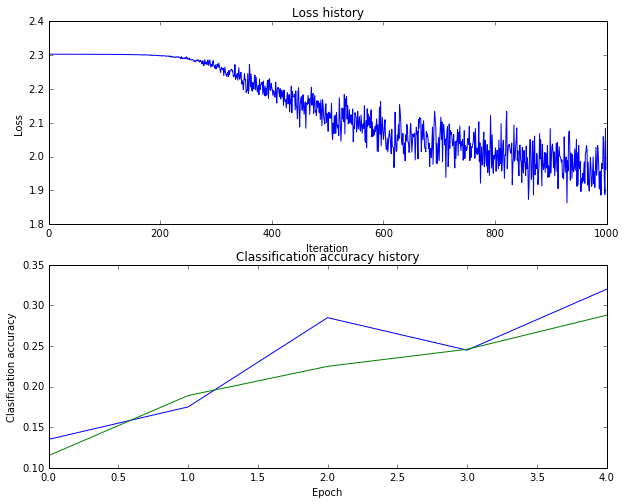

In [46]:
def plot_diagn(stats):
    # Plot the loss function and train / validation accuracies
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.show()
    
plot_diagn(stats)

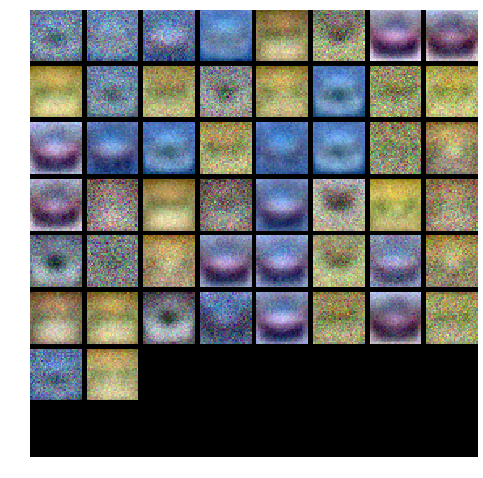

In [44]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

iteration 0 / 1000: loss 2.303127
iteration 100 / 1000: loss 1.927071
iteration 200 / 1000: loss 1.803013
iteration 300 / 1000: loss 1.566100
iteration 400 / 1000: loss 1.575874
iteration 500 / 1000: loss 1.538531
iteration 600 / 1000: loss 1.670876
iteration 700 / 1000: loss 1.554740
iteration 800 / 1000: loss 1.446207
iteration 900 / 1000: loss 1.342678
{'val_acc': 0.48599999999999999, 'hidden_size': 105, 'lr': 0.0011055970045771382, 'reg': 0.3030513545189741}


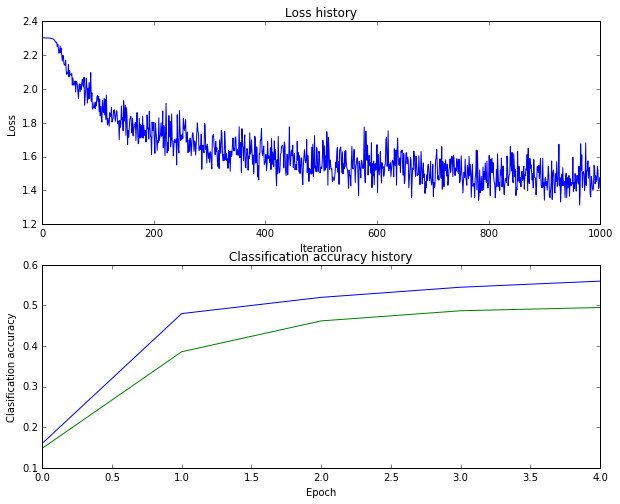

iteration 0 / 1000: loss 2.303089
iteration 100 / 1000: loss 2.005665
iteration 200 / 1000: loss 1.772183
iteration 300 / 1000: loss 1.614322
iteration 400 / 1000: loss 1.531307
iteration 500 / 1000: loss 1.595366
iteration 600 / 1000: loss 1.461155
iteration 700 / 1000: loss 1.568078
iteration 800 / 1000: loss 1.559977
iteration 900 / 1000: loss 1.375548
{'val_acc': 0.45800000000000002, 'hidden_size': 105, 'lr': 0.0010166725973380342, 'reg': 0.29692267370152436}


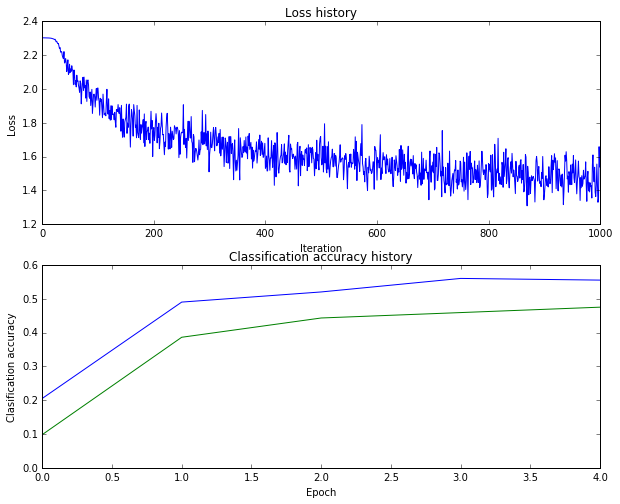

iteration 0 / 1000: loss 2.303014
iteration 100 / 1000: loss 1.952713
iteration 200 / 1000: loss 1.809799
iteration 300 / 1000: loss 1.692739
iteration 400 / 1000: loss 1.541430
iteration 500 / 1000: loss 1.649010
iteration 600 / 1000: loss 1.532386
iteration 700 / 1000: loss 1.423303
iteration 800 / 1000: loss 1.451978
iteration 900 / 1000: loss 1.381824
{'val_acc': 0.48699999999999999, 'hidden_size': 105, 'lr': 0.0010043664933101263, 'reg': 0.2855446892796543}


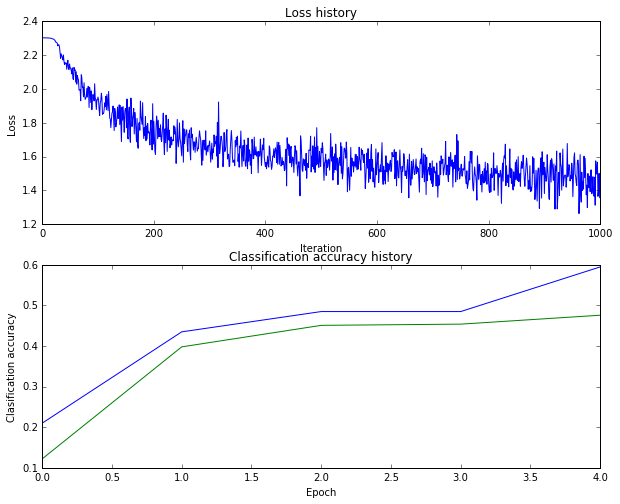

iteration 0 / 1000: loss 2.303053
iteration 100 / 1000: loss 1.793782
iteration 200 / 1000: loss 1.776618
iteration 300 / 1000: loss 1.563948
iteration 400 / 1000: loss 1.492979
iteration 500 / 1000: loss 1.651754
iteration 600 / 1000: loss 1.487199
iteration 700 / 1000: loss 1.570224
iteration 800 / 1000: loss 1.504603
iteration 900 / 1000: loss 1.356745
{'val_acc': 0.48199999999999998, 'hidden_size': 105, 'lr': 0.0016196450061123269, 'reg': 0.3036412202715962}


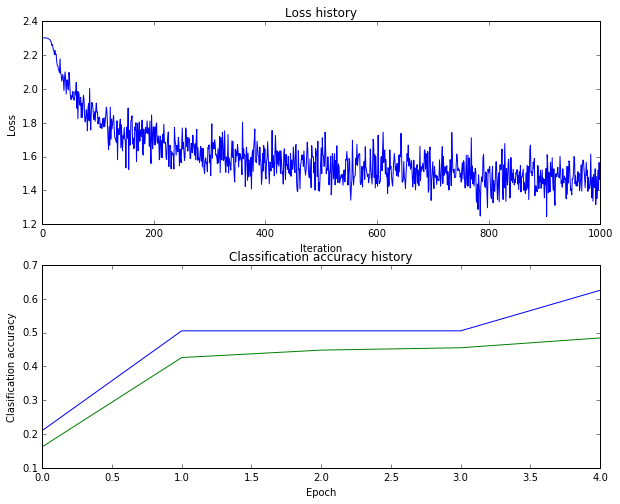

iteration 0 / 1000: loss 2.303104
iteration 100 / 1000: loss 1.869504
iteration 200 / 1000: loss 1.867109
iteration 300 / 1000: loss 1.640080
iteration 400 / 1000: loss 1.616024
iteration 500 / 1000: loss 1.534987
iteration 600 / 1000: loss 1.423987
iteration 700 / 1000: loss 1.525508
iteration 800 / 1000: loss 1.426857
iteration 900 / 1000: loss 1.425312
{'val_acc': 0.49199999999999999, 'hidden_size': 105, 'lr': 0.0010630993026748367, 'reg': 0.29864647218286533}


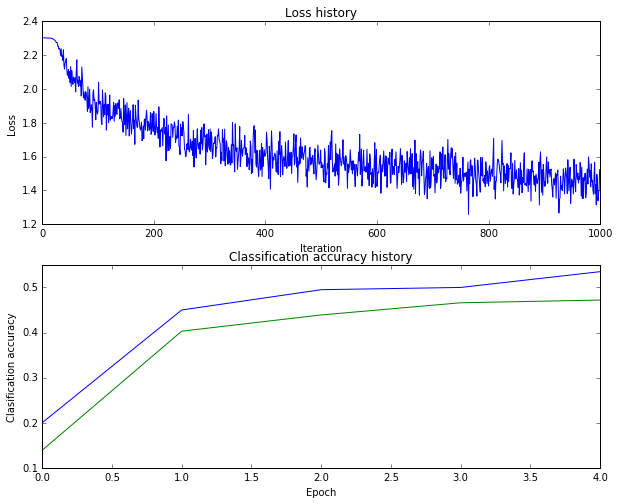

iteration 0 / 1000: loss 2.303085
iteration 100 / 1000: loss 2.006750
iteration 200 / 1000: loss 1.615908
iteration 300 / 1000: loss 1.662156
iteration 400 / 1000: loss 1.528366
iteration 500 / 1000: loss 1.549505
iteration 600 / 1000: loss 1.588538
iteration 700 / 1000: loss 1.527171
iteration 800 / 1000: loss 1.476418
iteration 900 / 1000: loss 1.369588
{'val_acc': 0.48099999999999998, 'hidden_size': 105, 'lr': 0.0011729927364081236, 'reg': 0.31457103142460163}


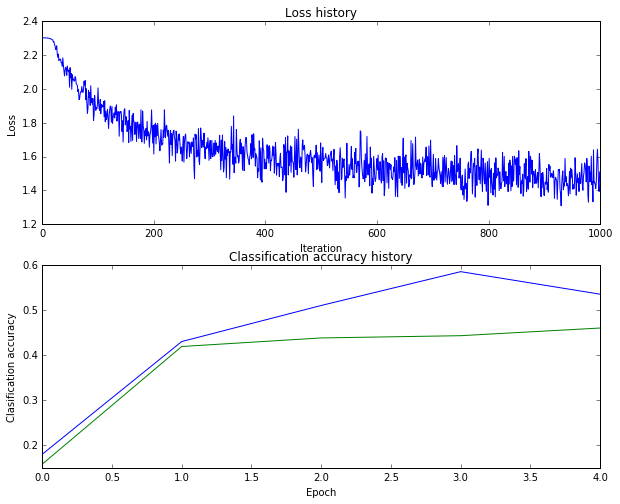

iteration 0 / 1000: loss 2.303125
iteration 100 / 1000: loss 1.852900
iteration 200 / 1000: loss 1.564384
iteration 300 / 1000: loss 1.598256
iteration 400 / 1000: loss 1.607907
iteration 500 / 1000: loss 1.435000
iteration 600 / 1000: loss 1.568489
iteration 700 / 1000: loss 1.595341
iteration 800 / 1000: loss 1.663519
iteration 900 / 1000: loss 1.454107
{'val_acc': 0.46200000000000002, 'hidden_size': 105, 'lr': 0.0016503072890485643, 'reg': 0.3125292182524239}


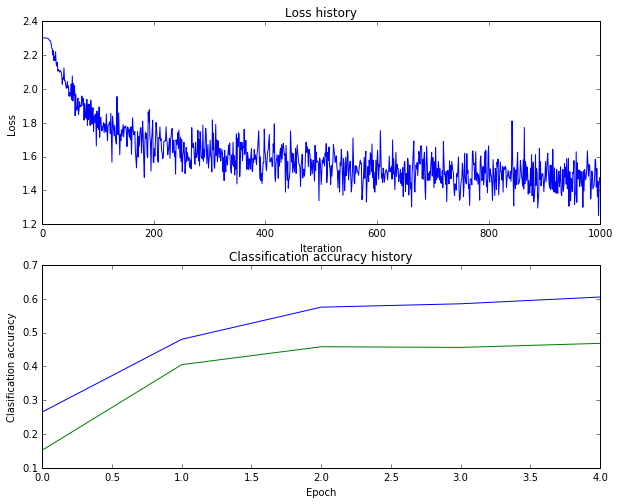

iteration 0 / 1000: loss 2.303039
iteration 100 / 1000: loss 1.796739
iteration 200 / 1000: loss 1.685922
iteration 300 / 1000: loss 1.716280
iteration 400 / 1000: loss 1.719703
iteration 500 / 1000: loss 1.573335
iteration 600 / 1000: loss 1.604358
iteration 700 / 1000: loss 1.429271
iteration 800 / 1000: loss 1.466942
iteration 900 / 1000: loss 1.385304
{'val_acc': 0.48799999999999999, 'hidden_size': 105, 'lr': 0.0013831314834130805, 'reg': 0.298329619462807}


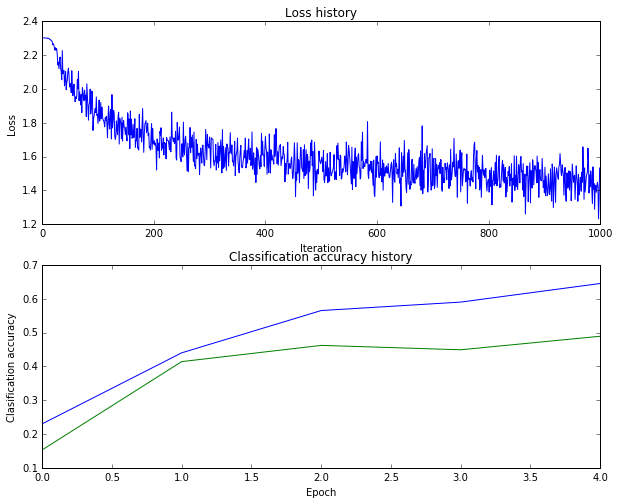

iteration 0 / 1000: loss 2.303050
iteration 100 / 1000: loss 1.809457
iteration 200 / 1000: loss 1.708475
iteration 300 / 1000: loss 1.595594
iteration 400 / 1000: loss 1.655870
iteration 500 / 1000: loss 1.578247
iteration 600 / 1000: loss 1.608178
iteration 700 / 1000: loss 1.399329
iteration 800 / 1000: loss 1.523940
iteration 900 / 1000: loss 1.354246
{'val_acc': 0.51400000000000001, 'hidden_size': 105, 'lr': 0.0013614702030685408, 'reg': 0.3020414533865454}


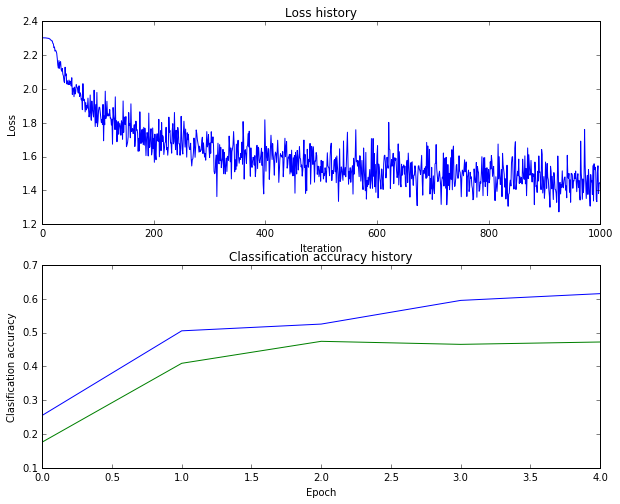

iteration 0 / 1000: loss 2.303055
iteration 100 / 1000: loss 1.868641
iteration 200 / 1000: loss 1.672886
iteration 300 / 1000: loss 1.668368
iteration 400 / 1000: loss 1.615420
iteration 500 / 1000: loss 1.550140
iteration 600 / 1000: loss 1.423453
iteration 700 / 1000: loss 1.566615
iteration 800 / 1000: loss 1.513390
iteration 900 / 1000: loss 1.599285
{'val_acc': 0.47599999999999998, 'hidden_size': 105, 'lr': 0.001169868658736309, 'reg': 0.2996518053191845}


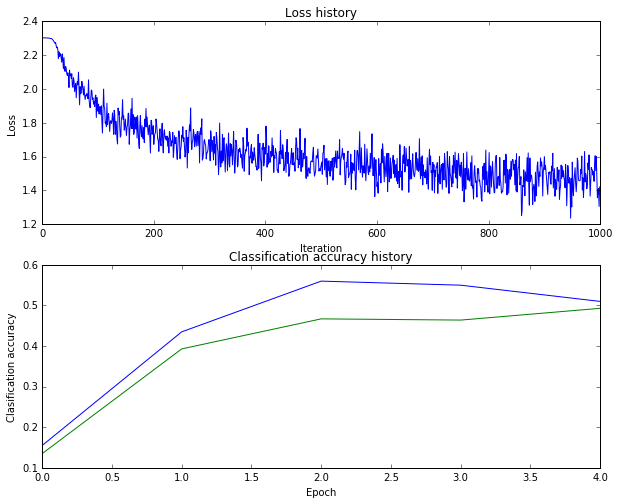

Best validation accuracy:  0.514


In [102]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
max_count = 10
input_size = 32 * 32 * 3
num_classes = 10
best_hy_params = {}
best_val = 0
results = []
for count in xrange(max_count):
    hidden_size = 105 #np.random.randint(104, 108)
    lr = 10**np.random.uniform(-2.75, -3)
    reg = 10**np.random.uniform(-0.55, -0.5)
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    # Train the network
    stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=1000, batch_size=200,
                learning_rate=lr, learning_rate_decay=0.95,
                reg=reg, verbose=True)
    # Predict on the validation set
    val_acc = (net.predict(X_val) == y_val).mean()
    params = {'hidden_size': hidden_size,
      'lr': lr,
      'reg': reg,
      'val_acc': val_acc}
    print params
    results.append(params)
    plot_diagn(stats)
    if val_acc > best_val:
        best_val = val_acc
        best_hy_params = params
        best_net = net


print 'Best validation accuracy: ', best_val

#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

In [103]:
results # 'hidden_size': 105, 'lr': 0.002381419030795897, 'reg': 0.29551223277759076}
#  {'hidden_size': 105,
#   'lr': 0.0016779876067417687,
#   'reg': 0.29290422948368333,
#   'val_acc': 0.504}]

[{'hidden_size': 105,
  'lr': 0.0011055970045771382,
  'reg': 0.3030513545189741,
  'val_acc': 0.48599999999999999},
 {'hidden_size': 105,
  'lr': 0.0010166725973380342,
  'reg': 0.29692267370152436,
  'val_acc': 0.45800000000000002},
 {'hidden_size': 105,
  'lr': 0.0010043664933101263,
  'reg': 0.2855446892796543,
  'val_acc': 0.48699999999999999},
 {'hidden_size': 105,
  'lr': 0.0016196450061123269,
  'reg': 0.3036412202715962,
  'val_acc': 0.48199999999999998},
 {'hidden_size': 105,
  'lr': 0.0010630993026748367,
  'reg': 0.29864647218286533,
  'val_acc': 0.49199999999999999},
 {'hidden_size': 105,
  'lr': 0.0011729927364081236,
  'reg': 0.31457103142460163,
  'val_acc': 0.48099999999999998},
 {'hidden_size': 105,
  'lr': 0.0016503072890485643,
  'reg': 0.3125292182524239,
  'val_acc': 0.46200000000000002},
 {'hidden_size': 105,
  'lr': 0.0013831314834130805,
  'reg': 0.298329619462807,
  'val_acc': 0.48799999999999999},
 {'hidden_size': 105,
  'lr': 0.0013614702030685408,
  'reg': 

In [108]:
input_size = 32 * 32 * 3
hidden_size = 105
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1500, batch_size=200,
            learning_rate=0.001, learning_rate_decay=0.95,
            reg=0.302, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc


iteration 0 / 1500: loss 2.303037
iteration 100 / 1500: loss 2.021957
iteration 200 / 1500: loss 1.785774
iteration 300 / 1500: loss 1.727069
iteration 400 / 1500: loss 1.643292
iteration 500 / 1500: loss 1.561003
iteration 600 / 1500: loss 1.693748
iteration 700 / 1500: loss 1.479776
iteration 800 / 1500: loss 1.533850
iteration 900 / 1500: loss 1.543879
iteration 1000 / 1500: loss 1.428164
iteration 1100 / 1500: loss 1.458901
iteration 1200 / 1500: loss 1.421770
iteration 1300 / 1500: loss 1.448660
iteration 1400 / 1500: loss 1.458342
Validation accuracy:  0.494


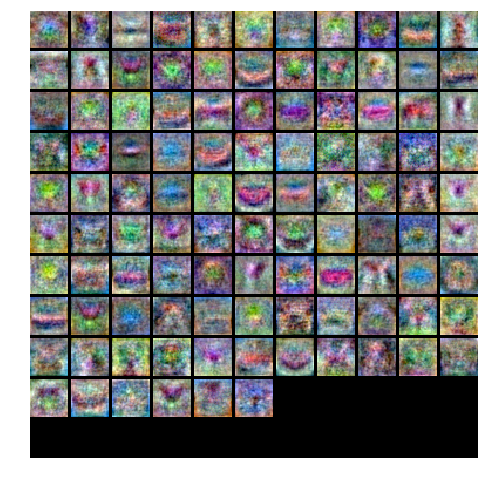

In [107]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [109]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print 'Test accuracy: ', test_acc

Test accuracy:  0.499
